# **AdvDS - Assignment 1: Binary Classification - NBA Player Prediction - Data Preparation**

Build a binary classification model that can predict if a rookie player will last at least 5 years in the NBA

**Student Name:** Nathan Fragar

**Student No. :** 93087548

**Week:** 2

**Date:** 20FEB2022

**Team Name:** Group 1
* Nuwan Munasinghe
* Wenyingwuwy
* Nathan Fragar
* Sean Williams

## 1. Load Dataset

**[1.1]** Task: Import required packages: Pandas, Numpy, joblib

In [140]:
# Task: Import the pandas, numpy, scipy stats and joblib package
import pandas as pd
import numpy as np
from scipy import stats
import joblib as job

**[1.2]** Task: Change working directory to /home/jovyan/work

In [141]:
cd /home/jovyan/work

/home/jovyan/work


**[1.3]** Task: Load Processed Data

In [142]:
from src.data.sets import load_sets

In [143]:
X_train, y_train, X_val, y_val, X_test, y_test = load_sets(path='data/processed/', val=False)

**[1.4]** Task: Automatically Reload Modules

In [144]:
# Automatically reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 3. Create Baseline Model

**[3.1]** Task: Find the mode of the target variable and print it's value

In [145]:
y_mode = np.array(stats.mode(y_train)[0])
print(y_mode)

[1]


**[3.2]** Task: Create a numpy array called y_base filled with this value

In [146]:
y_shape = (len(y_train), 1)
y_base = np.full(y_shape, y_mode)

**[3.3]** Task: Import the accuracy score from sklearn

In [147]:
from src.models.performance import print_reg_perf

**[3.4]** Task: Display the accuracy score of this baseline model

In [148]:
# print_reg_perf(y_train, y_base, set_name="Baseline")

The null accuracy is 83.35%
If we predict 1, we'll be correct 83.35% of the time

## 4. Logistic Regression - Hyperparameter Tuning with Grid Search and KFold

Train Logistic Regression Algorithm

1.   Use Grid Search to tune Hyper Parameters
2.   Use KFold with 5 Splits
3.   Fit Algorithm

**[4.1]** Task: Import GridSearchCV, KFold from sklearn.model_selection

In [149]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold

**[4.2]** Create a dictionary containing the Randomized Grid Search Parameters

In [150]:
# Linear Regression Random Grid Parameters
# Class Weight
class_weight = ['balanced']
# Penalty
penalty = ['none','l2','l1','elasticnet']
# Solver
solver = ['liblinear','lbfgs']
# max_iter
max_iter = [500]

random_grid = {'class_weight': class_weight,
               'penalty':penalty,
               'solver':solver,
               'max_iter':max_iter
               }



In [151]:
random_grid

{'class_weight': ['balanced'],
 'penalty': ['none', 'l2', 'l1', 'elasticnet'],
 'solver': ['liblinear', 'lbfgs'],
 'max_iter': [500]}

**[4.3]** Task: Create RF Model, and use Randomized Search to find GridSearch range

In [152]:
 from sklearn.linear_model import LogisticRegression as LR

In [153]:
lr_base = LR()
lr_random = RandomizedSearchCV(estimator = lr_base,
                               param_distributions = random_grid,
                               n_iter = 50, 
                               cv = 5,
                               verbose=2,
                               random_state=8, 
                               n_jobs = 4)

**[4.4]** Train Model

In [154]:
# Import Beep
from src.indicator.sounds import beep_when_done

In [155]:
lr_random.fit(X_train, y_train)

# Beep when completed
#beep_when_done()

print(lr_random.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced'}


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is not

"print(lr_random.best_params_)"

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced'}

In [156]:
lr_best = LR(solver='lbfgs', penalty='l2', max_iter=500, class_weight='balanced').fit(X_train, y_train)

In [157]:
from src.models.performance import score_models

In [158]:
score_models(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, y_base = y_base, includeBase = True, model = lr_best)

,Set Name,ACC,MSE,MAE,PREC,RECALL,F1,AUC
0,Train,0.644687,0.596081,0.355312,0.902023,0.643674,0.751258,0.708975
1,Validate,0.647500,0.593717,0.352500,0.902720,0.646927,0.753712,0.699031


**Observation** Training Model is overfitting

**[4.5]** Tune Hyperparameters to better reduce overfitting.

1. Reduce Depth to and 
2. increase min samples per leaf to 10

In [159]:
lr_best_1 = LR(solver='lbfgs', penalty='none', max_iter=1000, class_weight='balanced').fit(X_train, y_train)

In [160]:
score_models(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, y_base = y_base, includeBase = True, model = lr_best_1)

,Set Name,ACC,MSE,MAE,PREC,RECALL,F1,AUC
0,Train,0.645312,0.595556,0.354687,0.902337,0.644236,0.751750,0.709864
1,Validate,0.648750,0.592663,0.351250,0.902083,0.649175,0.755013,0.695494


**Observations**
* Validation Dataset is not performing well for the model, indicating Model is overfitting on Train Dataset

**[4.6]** Task: Plot Confusion Matrix

Identify how well the model is performing at predicting the outcome

In [161]:
from src.visualization.visualize import plot_confusion_matrix_full

Train - Confusion matrix, without normalization
[[ 693  372]
 [1898 3437]]
Train - Normalized confusion matrix
[[0.65070423 0.34929577]
 [0.35576382 0.64423618]]
Validate - Confusion matrix, without normalization
[[172  94]
 [468 866]]
Validate - Normalized confusion matrix
[[0.64661654 0.35338346]
 [0.35082459 0.64917541]]


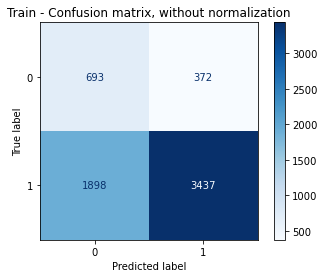

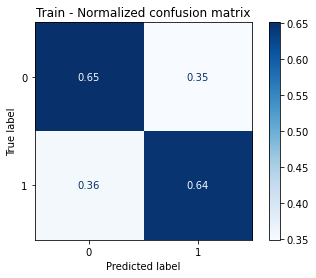

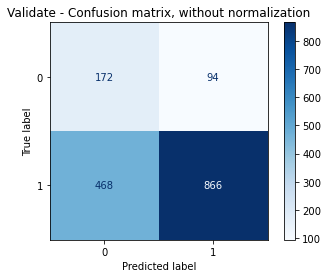

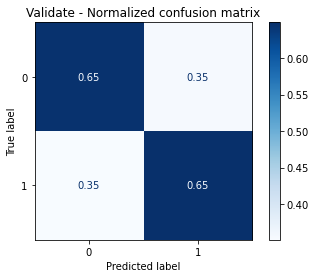

In [162]:
plot_confusion_matrix_full(model = lr_best_1 ,X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val)

**Observation** Both Models is predicting alot of False Positives (FP) in both training and validation datasets

**[4.7]** Task: Calculate AUROC

In [163]:
from sklearn.metrics import roc_auc_score

In [164]:
lr_best_1_y_train_proba = lr_best_1.predict_proba(X_train)[:, 1]
lr_best_1_y_val_proba = lr_best_1.predict_proba(X_val)[:, 1]
print("rf_best_1_proba:", lr_best_1_y_train_proba)

rf_best_1_proba: [0.50900252 0.09646172 0.65959178 ... 0.53937203 0.4747057  0.75499758]


In [165]:
roc_auc_score(y_train, lr_best_1_y_train_proba)

0.7098637309643554

In [166]:
roc_auc_score(y_val, lr_best_1_y_val_proba)

0.6954943580841157

**Observations** 
* Training Dataset has a AUROC prediction 0.711
* Validation Dataset has a poor AUROC prediction 0.698. This indicates the model is fitting reasonably well on unseen data
* The finaly Kaggle result AUROC 0.71246 - Best Personal Result (to-date)

## 5. Plot AUC

In [167]:
from src.visualization.visualize import plot_roc_auc

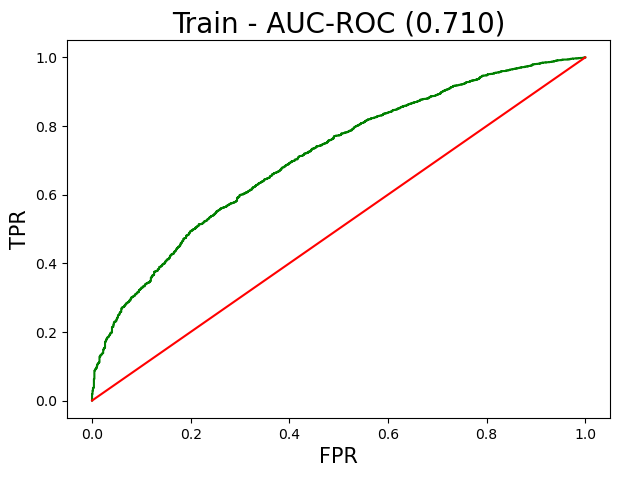

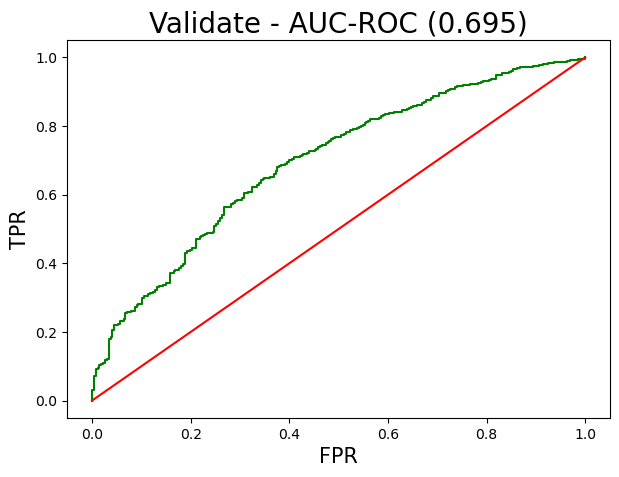

In [168]:
plot_roc_auc(model = lr_best_1 ,X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val)

## 6. Logistic Regression - Kaggle Competition Preparation

**[6.1]** Prepare Kaggle Input File using rf_best Random Forest Model

In [169]:
# File URLs
file_path_test= "data/processed/test.csv"

# Load files into df_training and df_validation data frames
df_test = pd.read_csv(file_path_test)

In [170]:

# Drop Target and ID for X, and create target from y
X_test_id = df_test['Id']
X_test = df_test.drop(['Id'], axis=1)

**[6.2]** Check Test Dataset is ready for predicting

In [171]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GP            3799 non-null   float64
 1   MIN           3799 non-null   float64
 2   PTS           3799 non-null   float64
 3   FGM           3799 non-null   float64
 4   FGA           3799 non-null   float64
 5   FG%           3799 non-null   float64
 6   3P Made       3799 non-null   float64
 7   3PA           3799 non-null   float64
 8   3P%           3799 non-null   float64
 9   FTM           3799 non-null   float64
 10  FTA           3799 non-null   float64
 11  FT%           3799 non-null   float64
 12  OREB          3799 non-null   float64
 13  DREB          3799 non-null   float64
 14  REB           3799 non-null   float64
 15  AST           3799 non-null   float64
 16  STL           3799 non-null   float64
 17  BLK           3799 non-null   float64
 18  TOV           3799 non-null 

**[6.3]** Create y Prediction using the Test Dataset

In [172]:
y_predict = lr_best_1.predict_proba(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [173]:
print(y_predict)

[[0.59137596 0.40862404]
 [0.67245983 0.32754017]
 [0.33260677 0.66739323]
 ...
 [0.64105618 0.35894382]
 [0.20119632 0.79880368]
 [0.66686375 0.33313625]]


In [174]:
print(y_predict[:,1])

[0.40862404 0.32754017 0.66739323 ... 0.35894382 0.79880368 0.33313625]


**[6.4]** Convert the Numpy Array into a Pandas Dataframe with a Column Name TARGET_5Yrs

In [175]:
# Convert numpy arrany y_predict values back to df_train_cleaned_scaled data frame 
y_predict = pd.DataFrame(y_predict[:,1], columns = ['TARGET_5Yrs'])

**[6.5]** Concatenate Player ID and Prediction into on Data Frame and Sort by Id

In [176]:
y_predict = pd.concat([X_test_id, y_predict], axis=1)

In [177]:
y_predict = y_predict.sort_values(by=['Id'])

In [178]:
print(y_predict)

         Id  TARGET_5Yrs
0         1     0.408624
2         3     0.667393
5         6     0.623414
8        14     0.428075
10       17     0.526734
...     ...          ...
3057  13770     0.720739
3058  13771     0.384998
3059  13774     0.449022
3063  13787     0.412688
3064  13792     0.489058

[3799 rows x 2 columns]


**[6.6]** Export Dataframe to CSV and save model

In [179]:
y_predict.to_csv("data/external/submission_nfragar_20220227_linear_regression_w3_2_add_kmeans_feature.csv", index = False)
y_predict.shape

(3799, 2)

[CV] END class_weight=balanced, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=none, solver=lbfgs; total time=   0.4s
[CV] END class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END class_weight=balanced, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=liblinear; total time=   2.2s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END class_weight=balanced, max_iter=500, penalty=l1, solver=lbfgs